# Data notebook

---

We handle the data here.

## Imports

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

In [34]:
rho = "1.0"

In [35]:
data = sio.loadmat(f"/home/azouaoui/CH4/hsi_unmixing/data/MixedRatio_rho{rho}.mat")
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Y', 'E', 'A'])

In [36]:
D = sio.loadmat("/home/azouaoui/CH4/HySUPP/data/Sim1.mat")["D"]

In [37]:
D.shape

(224, 498)

In [38]:
Y = data["Y"]
A = data["A"]
E = data["E"]

In [39]:
L, M = D.shape
LE, p = E.shape
assert L == LE
LY, N = Y.shape
pA, NA = A.shape
assert p == pA
assert N == NA
H, W = 25, 40
assert H * W == N

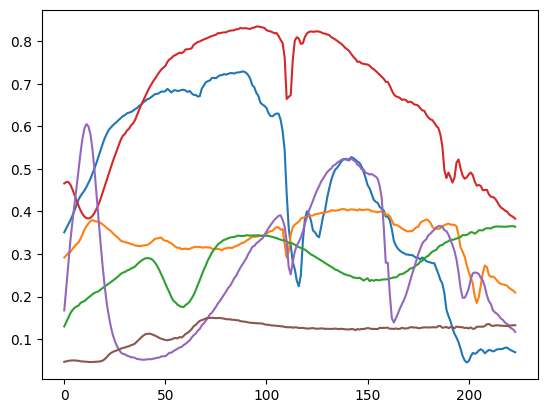

In [40]:
plt.plot(E);

In [41]:
# TODO find indices of endmembers from the USGS library
indices = []
for pp in range(p):
    x = E[:, pp]
    dist = []
    for mm in range(M):
        dist.append(np.linalg.norm(D[:, mm] - x))
    ind = np.argmin(dist)
    print(ind)
    indices.append(ind)

162
319
210
138
97
197


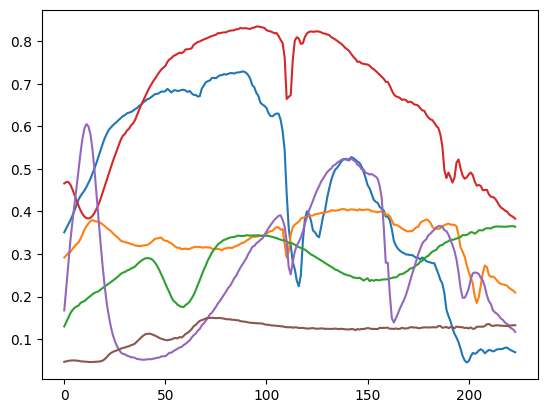

In [42]:
plt.plot(D[:, indices]);

In [43]:
new_data = {"Y": Y, "E": E, "A": A, "H": H, "W": W, "L": L, "p": p, "M": M, "N": N, "D": D, "index": indices}
sio.savemat(f"../data/MixedRatio_rho{rho}.mat", new_data)

## Library endmembers names

In [44]:
USGS = sio.loadmat("/home/azouaoui/USGS_1995_Library.mat")

In [45]:
USGS.keys()

dict_keys(['__header__', '__version__', '__globals__', 'names', 'datalib'])

In [46]:
names = USGS["names"]
names.shape

(501, 29)

In [47]:
dd = USGS["datalib"]
dd.shape

(224, 501)

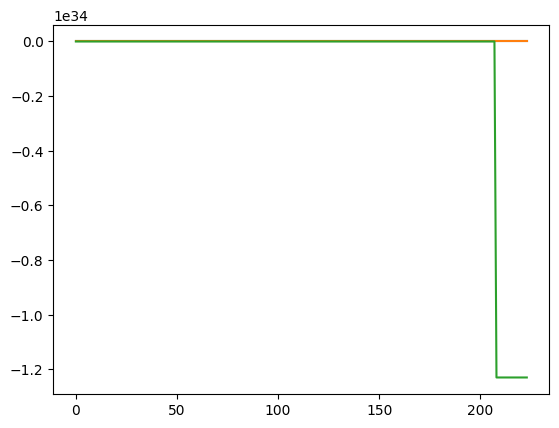

In [48]:
plt.plot(dd[:, :3])

In [50]:
names[:3]

array([[ 87,  97, 118, 101, 108, 101, 110, 103, 116, 104, 115,  32, 105,
        110,  32, 109, 105,  99, 114, 111, 110, 115,  32,  50,  50,  52,
         99,  32,  10],
       [ 82, 101, 115, 111, 108, 117, 116, 105, 111, 110,  32,  32, 105,
        110,  32, 109, 105,  99, 114, 111, 110, 115,  32,  50,  50,  52,
         99,  32,  10],
       [ 68,  97, 116,  97,  32, 118,  97, 108, 117, 101,  32,  61,  32,
         99, 104,  97, 110, 110, 101, 108,  32, 110, 117, 109,  98, 101,
        114,  32,  10]], dtype=uint8)

In [63]:
for index in indices:
    name = names[index + 3]
    print("".join([chr(nn) for nn in name]))    

Goethite WS222              

Niter GDS43 (K-Saltpeter)   

Hypersthene PYX02.f 60um    

Endellite GDS16             

Clinochlore GDS158          

Heulandite NMNH84534        



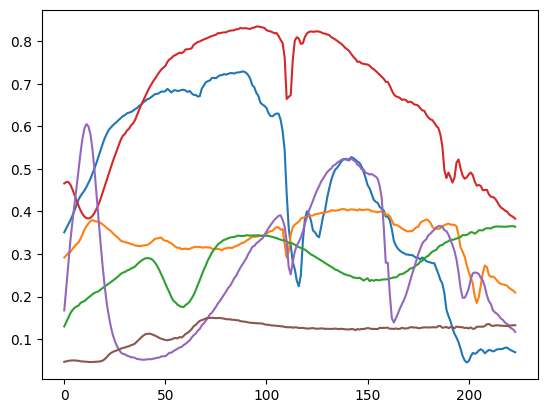

In [64]:
plt.plot(D[:, indices]);

## Sim 1

In [5]:
data = sio.loadmat("/home/azouaoui/CH4/HySUPP/data/Sim1.mat")
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Y', 'E', 'A', 'H', 'W', 'p', 'L', 'D', 'M', 'index'])

In [6]:
E = data["E"]

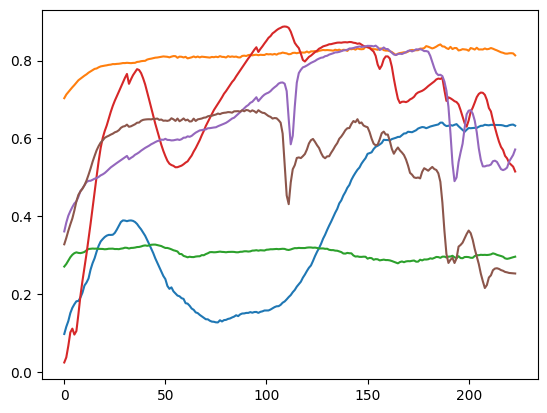

In [7]:
plt.plot(E);

In [9]:
D = data["D"]

In [10]:
D.shape

(224, 498)

## Apex ground truth measurements

In [1]:
path = "../data/spec_alb_APEX_OSD.dat"

In [67]:
import pandas as pd
import numpy as np

In [51]:
df = pd.read_csv(path, skiprows=16, delimiter="\s+")

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25835 entries, 1 to 2.500
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   !       25824 non-null  object
dtypes: object(1)
memory usage: 403.7+ KB


In [59]:
categories = ["Concrete1_plSTD",
"Concrete1_miSTD",
"Grass1_plSTD",
"Grass1_miSTD",
"Roof1_plSTD",
"Roof1_miSTD",
"Sand1_plSTD",
"Sand1_miSTD",
"Water1_plSTD",
"Water1_miSTD",
"YellowTartan1_plSTD",
"YellowTartan1_miSTD"]

In [60]:
offset = 2153

In [61]:
k = 0

In [62]:
data = {categories[k]: df[offset * k + 1:(k + 1) * offset - 1].values.squeeze() for k in range(len(categories))}

In [63]:
data

{'Concrete1_plSTD': array(['0.113', '0.113', '0.091', ..., '0.207', '0.207', '0.207'],
       dtype=object),
 'Concrete1_miSTD': array(['0.109', '0.109', '0.088', ..., '0.179', '0.179', '0.179'],
       dtype=object),
 'Grass1_plSTD': array(['0.008', '0.008', '0.007', ..., '0.046', '0.046', '0.046'],
       dtype=object),
 'Grass1_miSTD': array(['0.007', '0.007', '0.006', ..., '0.027', '0.027', '0.027'],
       dtype=object),
 'Roof1_plSTD': array(['0.049', '0.049', '0.039', ..., '0.053', '0.053', '0.053'],
       dtype=object),
 'Roof1_miSTD': array(['0.046', '0.046', '0.037', ..., '0.028', '0.028', '0.028'],
       dtype=object),
 'Sand1_plSTD': array(['0.075', '0.075', '0.060', ..., '0.255', '0.255', '0.255'],
       dtype=object),
 'Sand1_miSTD': array(['0.072', '0.072', '0.058', ..., '0.227', '0.227', '0.227'],
       dtype=object),
 'Water1_plSTD': array(['0.017', '0.017', '0.014', ..., '0.015', '0.015', '0.015'],
       dtype=object),
 'Water1_miSTD': array(['0.016', '0.016', '0

In [70]:
np.arange(350, 2501).shape

(2151,)

In [74]:
raw_df = pd.DataFrame(data, index=np.arange(350, 2501), dtype=float)

In [89]:
raw_df.head()

,Concrete1_plSTD,Concrete1_miSTD,Grass1_plSTD,Grass1_miSTD,Roof1_plSTD,Roof1_miSTD,Sand1_plSTD,Sand1_miSTD,Water1_plSTD,Water1_miSTD,YellowTartan1_plSTD,YellowTartan1_miSTD
350,0.113,0.109,0.008,0.007,0.049,0.046,0.075,0.072,0.017,0.016,0.051,0.048
351,0.113,0.109,0.008,0.007,0.049,0.046,0.075,0.072,0.017,0.016,0.051,0.048
352,0.091,0.088,0.007,0.006,0.039,0.037,0.060,0.058,0.014,0.013,0.041,0.038
353,0.114,0.110,0.008,0.007,0.049,0.046,0.075,0.072,0.017,0.016,0.051,0.048
354,0.099,0.096,0.007,0.006,0.043,0.040,0.065,0.063,0.015,0.014,0.044,0.042


In [90]:
raw_df.tail()

,Concrete1_plSTD,Concrete1_miSTD,Grass1_plSTD,Grass1_miSTD,Roof1_plSTD,Roof1_miSTD,Sand1_plSTD,Sand1_miSTD,Water1_plSTD,Water1_miSTD,YellowTartan1_plSTD,YellowTartan1_miSTD
2496,0.207,0.179,0.046,0.027,0.053,0.028,0.255,0.227,0.015,0.0,0.176,0.152
2497,0.207,0.179,0.046,0.027,0.053,0.028,0.255,0.227,0.015,0.0,0.176,0.152
2498,0.207,0.179,0.046,0.027,0.053,0.028,0.255,0.227,0.015,0.0,0.176,0.152
2499,0.207,0.179,0.046,0.027,0.053,0.028,0.255,0.227,0.015,0.0,0.176,0.152
2500,0.207,0.179,0.046,0.027,0.053,0.028,0.255,0.227,0.015,0.0,0.176,0.152


In [77]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2151 entries, 350 to 2500
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Concrete1_plSTD      2151 non-null   float64
 1   Concrete1_miSTD      2151 non-null   float64
 2   Grass1_plSTD         2151 non-null   float64
 3   Grass1_miSTD         2151 non-null   float64
 4   Roof1_plSTD          2151 non-null   float64
 5   Roof1_miSTD          2151 non-null   float64
 6   Sand1_plSTD          2151 non-null   float64
 7   Sand1_miSTD          2151 non-null   float64
 8   Water1_plSTD         2151 non-null   float64
 9   Water1_miSTD         2151 non-null   float64
 10  YellowTartan1_plSTD  2151 non-null   float64
 11  YellowTartan1_miSTD  2151 non-null   float64
dtypes: float64(12)
memory usage: 218.5 KB


In [78]:
import spectral.io.envi as envi

In [79]:
hsi = envi.open("../data/APEX_OSD_Package_1.0/APEX_OSD_V1_calibr_cube.hdr", "../data/APEX_OSD_Package_1.0/APEX_OSD_V1_calibr_cube")

In [99]:
wls = np.round(np.array(hsi.metadata["wavelength"], dtype=np.float64) * 1000).astype(np.int64)
wls

array([ 413,  426,  439,  450,  461,  471,  480,  490,  499,  508,  517,
        525,  532,  539,  546,  552,  557,  562,  568,  572,  576,  580,
        584,  588,  592,  597,  601,  606,  611,  615,  619,  622,  624,
        627,  629,  632,  634,  637,  640,  642,  645,  648,  651,  654,
        657,  660,  663,  666,  669,  672,  675,  678,  682,  685,  688,
        692,  695,  699,  702,  706,  710,  713,  717,  721,  725,  729,
        733,  737,  741,  745,  749,  754,  758,  762,  767,  772,  776,
        781,  786,  791,  796,  801,  806,  811,  817,  822,  828,  833,
        839,  845,  851,  857,  863,  869,  875,  882,  888,  895,  901,
        908,  915,  922,  930,  937,  944,  951,  959,  966,  973,  980,
        984,  993, 1002, 1010, 1019, 1028, 1037, 1046, 1055, 1064, 1073,
       1082, 1092, 1102, 1111, 1121, 1130, 1139, 1149, 1159, 1168, 1178,
       1187, 1197, 1207, 1217, 1226, 1236, 1246, 1256, 1266, 1275, 1285,
       1294, 1304, 1314, 1324, 1333, 1343, 1353, 13

In [107]:
subset_raw_df = raw_df.loc[wls]
subset_raw_df.head()

,Concrete1_plSTD,Concrete1_miSTD,Grass1_plSTD,Grass1_miSTD,Roof1_plSTD,Roof1_miSTD,Sand1_plSTD,Sand1_miSTD,Water1_plSTD,Water1_miSTD,YellowTartan1_plSTD,YellowTartan1_miSTD
413,0.144,0.141,0.015,0.013,0.049,0.046,0.096,0.092,0.020,0.019,0.085,0.079
426,0.152,0.148,0.017,0.015,0.048,0.046,0.102,0.098,0.021,0.021,0.091,0.084
439,0.160,0.156,0.018,0.016,0.048,0.046,0.109,0.104,0.024,0.023,0.099,0.091
450,0.166,0.162,0.019,0.017,0.048,0.046,0.113,0.109,0.026,0.025,0.107,0.098
461,0.170,0.165,0.019,0.018,0.048,0.045,0.116,0.112,0.028,0.027,0.111,0.102


In [127]:
def process_columns(df):
    mean_data = {}
    columns = df.columns
    data_keys = [columns[kk].split("_")[0][:-1] for kk in range(0, 12, 2)]
    #print(data_keys)
    for jj, ii in enumerate(range(0, 12, 2)):
        mean_data[data_keys[jj]] = (df[columns[ii]].values + df[columns[ii + 1]].values) / 2
    return pd.DataFrame(mean_data, index=df.index)

In [128]:
mean_df = process_columns(subset_raw_df)

In [130]:
mean_df.head()

,Concrete,Grass,Roof,Sand,Water,YellowTartan
413,0.1425,0.0140,0.0475,0.0940,0.0195,0.0820
426,0.1500,0.0160,0.0470,0.1000,0.0210,0.0875
439,0.1580,0.0170,0.0470,0.1065,0.0235,0.0950
450,0.1640,0.0180,0.0470,0.1110,0.0255,0.1025
461,0.1675,0.0185,0.0465,0.1140,0.0275,0.1065


In [132]:
mean_df.values.shape

(285, 6)

<Axes: >

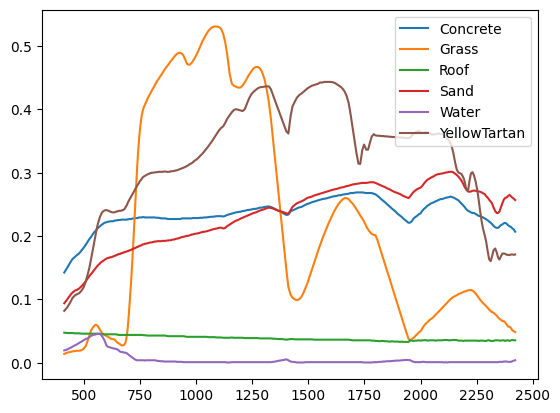

In [133]:
mean_df.plot()

* I believe `Roof` is incorrect here and should be swapped with `Sand`

* **TODO**:
  1. Swap these values
  2. Reorder columns to match the abundances order in the `TinyAPEX` dataset

In [135]:
mean_df.columns

Index(['Concrete', 'Grass', 'Roof', 'Sand', 'Water', 'YellowTartan'], dtype='object')

In [136]:
mapper = {'Concrete': 'Concrete',
        'Grass': 'Grass',
        'Roof': 'Sand',
        'Sand': 'Roof',
        'Water': 'Water',
        'YellowTartan': 'YellowTartan'}

In [139]:
rename_df = mean_df.rename(mapper=mapper, axis=1)
rename_df.head()

,Concrete,Grass,Sand,Roof,Water,YellowTartan
413,0.1425,0.0140,0.0475,0.0940,0.0195,0.0820
426,0.1500,0.0160,0.0470,0.1000,0.0210,0.0875
439,0.1580,0.0170,0.0470,0.1065,0.0235,0.0950
450,0.1640,0.0180,0.0470,0.1110,0.0255,0.1025
461,0.1675,0.0185,0.0465,0.1140,0.0275,0.1065


In [140]:
new_cols = ['Concrete', 'Grass', 'Roof', 'Water', 'Sand', 'YellowTartan']
final_df = rename_df[new_cols]
final_df.head()

,Concrete,Grass,Roof,Water,Sand,YellowTartan
413,0.1425,0.0140,0.0940,0.0195,0.0475,0.0820
426,0.1500,0.0160,0.1000,0.0210,0.0470,0.0875
439,0.1580,0.0170,0.1065,0.0235,0.0470,0.0950
450,0.1640,0.0180,0.1110,0.0255,0.0470,0.1025
461,0.1675,0.0185,0.1140,0.0275,0.0465,0.1065


<Axes: >

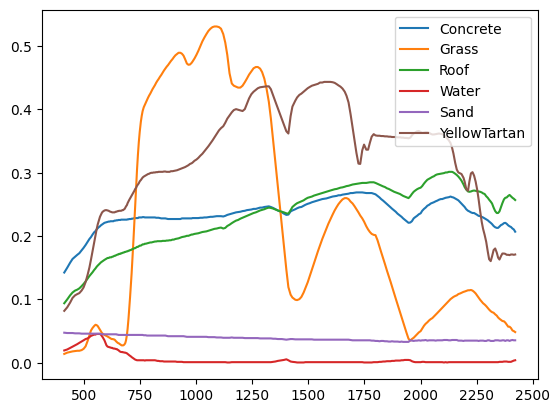

In [141]:
final_df.plot()

### Putting it all together

In [142]:
import scipy.io as sio

In [143]:
apex = sio.loadmat("../data/TinyAPEX.mat")
apex.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Y', 'E', 'A', 'H', 'W', 'L', 'p', 'labels'])

In [144]:
apex["labels"]

array([[0, 1, 2, 3]])

In [146]:
M = 6
D = final_df.values
index = np.arange(4)
labels = ["Concrete", "Grass", "Roof", "Water"]

In [147]:
new_apex = {"Y": apex["Y"], "E": apex["E"], "A": apex["A"], "H": apex["H"], "W": apex["W"], "L": apex["L"], "p": apex["p"],
            "labels": labels, "M": M, "D": D, "index": index}

In [148]:
sio.savemat("../data/NewAPEX.mat", new_apex)